# Analyis of Merge-Insertion Hybrid Sort

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
file_path = "hybridsort_output_S=50.csv"
df = pd.read_csv(file_path)
df

,Size of array,Average Key Comparisons,Average Time Taken
0,1000,12126.4,0.001801
1,6000,103655.8,0.012148
2,11000,186098.2,0.025259
3,16000,236119.2,0.032430
4,21000,361274.0,0.042874
...,...,...,...
195,976000,17569333.2,2.434800
196,981000,17877218.6,2.462170
197,986000,17843440.8,2.516132
198,991000,18024791.4,2.521041


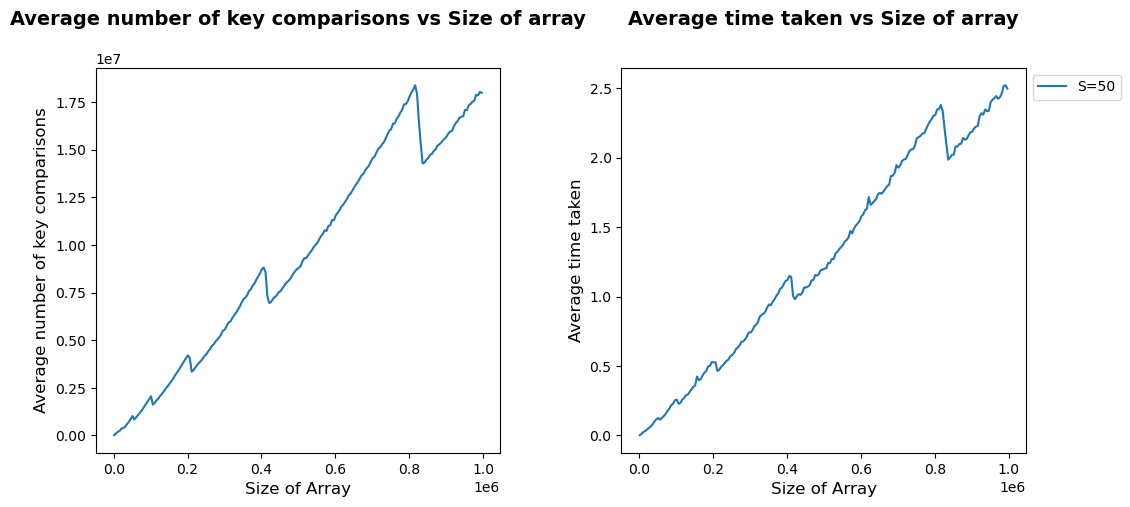

In [3]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
x = df.iloc[:, 0]
y = df.iloc[:, 1]

axes[0].plot(x, y)
axes[0].set_title('Average number of key comparisons vs Size of array', fontsize=14, fontweight='bold', y=1.09)
axes[0].set_xlabel('Size of Array', fontsize=12)
axes[0].set_ylabel('Average number of key comparisons', fontsize=12)

x2 = df.iloc[:, 0]  
y2 = df.iloc[:, 2]  
axes[1].plot(x2, y2, label='S=50')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('Average time taken vs Size of array', fontsize=14, fontweight='bold', y=1.09)
axes[1].set_xlabel('Size of Array', fontsize=12)
axes[1].set_ylabel('Average time taken', fontsize=12)
plt.subplots_adjust(wspace=0.3)
plt.show()

# Theoretical Time Complexity vs Size of array, N

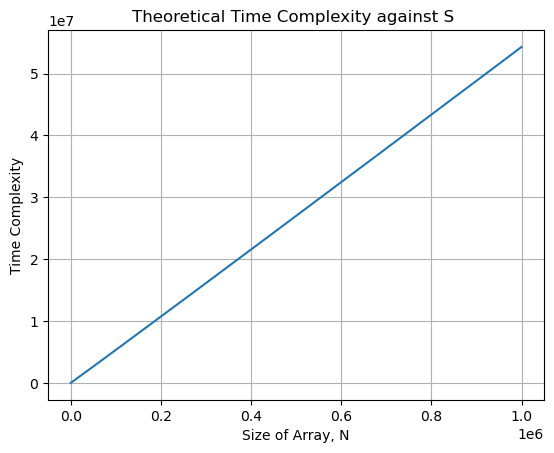

In [4]:
N = np.array(range(1, 1000000))
S = 50
y = N*S + N*(np.log10(N/S))
plt.plot(N,y)
plt.xlabel('Size of Array, N')
plt.ylabel('Time Complexity')
plt.title('Theoretical Time Complexity against S ')
plt.grid(True)
plt.show()

We can see that out result has a similar upward, almost linear trend as the theoretical result. There are some drops in number of key comparisons and time taken in our empirical result, this could be because of the data variabilty, since our datasets are all generated randomly. (So, certain datasets might be more sorted even before applying the sorting algorithm.)

## Varying S, fix array size, N at 10 million

In [5]:
file_path = "hybridsort_output_varying_S.csv"
df = pd.read_csv(file_path)
df

,S,Average Key Comparisons,Average Time Taken
0,1,13796886.0,2.596324
1,2,12804982.0,2.422298
2,3,12673115.0,2.378363
3,4,12824058.0,2.253866
4,5,13112662.0,2.275661
...,...,...,...
95,96,25416544.0,3.316233
96,97,25490419.0,3.290714
97,98,25485961.0,3.378095
98,99,25272621.0,3.255931


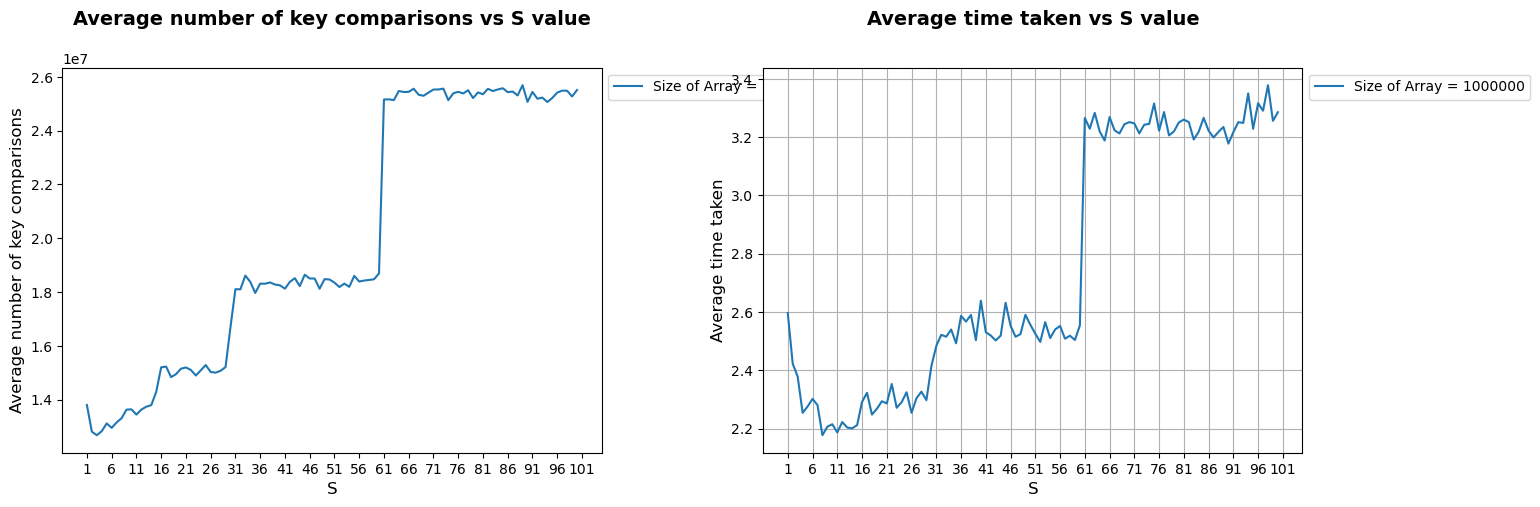

In [6]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

x2 = df.iloc[:, 0]  
y2 = df.iloc[:, 2]  

fig, axes = plt.subplots(1, 2, figsize=(16, 5))


x_interval = 5
axes[0].plot(x, y, label='Size of Array = 1000000')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].set_title('Average number of key comparisons vs S value', fontsize=14, fontweight='bold', y=1.09)
axes[0].set_xlabel('S', fontsize=12)
axes[0].set_ylabel('Average number of key comparisons', fontsize=12)
axes[0].set_xticks(range(int(min(x)), int(max(x)) + x_interval, x_interval))  


axes[1].plot(x2, y2, label='Size of Array = 1000000')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[1].set_title('Average time taken vs S value', fontsize=14, fontweight='bold', y=1.09)
axes[1].set_xlabel('S', fontsize=12)
axes[1].set_ylabel('Average time taken', fontsize=12)
axes[1].set_xticks(range(int(min(x2)), int(max(x2)) + x_interval, x_interval))  
plt.grid(True)
plt.subplots_adjust(wspace=0.3)

plt.show()

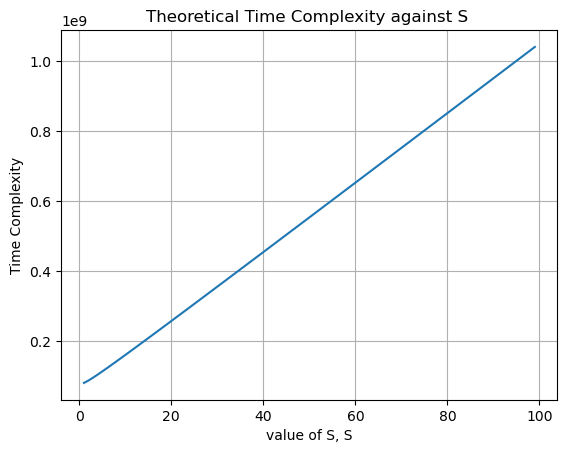

In [7]:
S = np.array(range(1, 100))
N = 10000000
y = N*S + N*(np.log10(N/S))
plt.plot(S,y)
plt.xlabel('value of S, S')
plt.ylabel('Time Complexity')
plt.title('Theoretical Time Complexity against S ')
plt.grid(True)
plt.show()

The trend in both the theoretical analysis and empirical analysis follow an upward pattern. Therefore, we know that as the value of S increases, the number of key comparisons will also increase.

We also try to find the size of array when InsertionSort is faster than MergeSort. So we try to find the intersection point of MergeSort and InsertionSort in a graph of Number of key comparisons vs size of array.

In [8]:
df1 = pd.read_csv('insertionsort_output.csv')
df2 = pd.read_csv('mergesort_output1.csv')

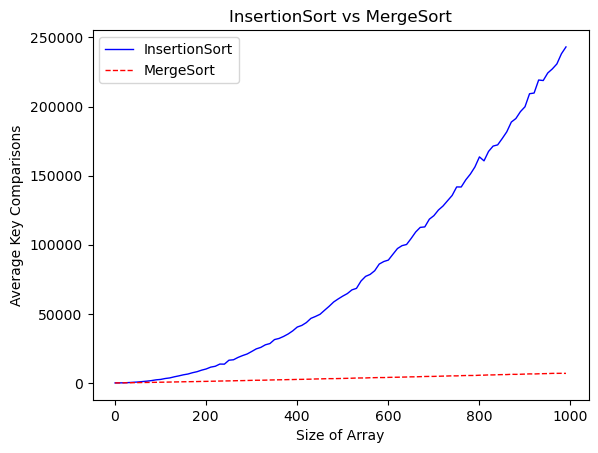

In [9]:
fig, ax = plt.subplots()
ax.plot(df1['Size of array'], df1['Average Key Comparisons'], label='InsertionSort', color='blue', linestyle='-',linewidth=1)
ax.plot(df2['Size of array'], df2['Average Key Comparisons'], label='MergeSort', color='red', linestyle='--',linewidth=1)

ax.set_xlabel('Size of Array')
ax.set_ylabel('Average Key Comparisons')
ax.set_title('InsertionSort vs MergeSort')
ax.legend()
plt.show()

In [10]:
df1 = pd.read_csv('insertionsort_output1.csv')
df2 = pd.read_csv('mergesort_output2.csv')

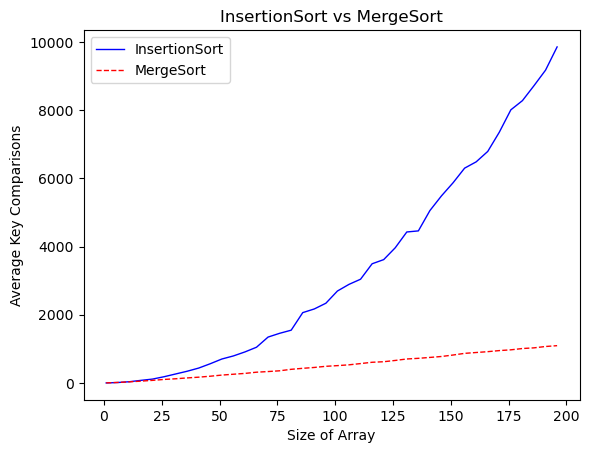

In [11]:
fig, ax = plt.subplots()
ax.plot(df1['Size of array'], df1['Average Key Comparisons'], label='InsertionSort', color='blue', linestyle='-',linewidth=1)
ax.plot(df2['Size of array'], df2['Average Key Comparisons'], label='MergeSort', color='red', linestyle='--',linewidth=1)

ax.set_xlabel('Size of Array')
ax.set_ylabel('Average Key Comparisons')
ax.set_title('InsertionSort vs MergeSort')
ax.legend()
plt.show()

In [12]:
df1 = pd.read_csv('insertionsort_output2.csv')
df2 = pd.read_csv('mergesort_output3.csv')

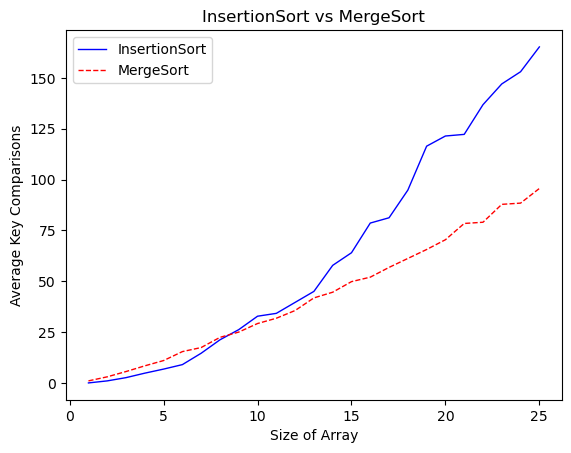

In [13]:
fig, ax = plt.subplots()
ax.plot(df1['Size of array'], df1['Average Key Comparisons'], label='InsertionSort', color='blue', linestyle='-',linewidth=1)
ax.plot(df2['Size of array'], df2['Average Key Comparisons'], label='MergeSort', color='red', linestyle='--',linewidth=1)

ax.set_xlabel('Size of Array')
ax.set_ylabel('Average Key Comparisons')
ax.set_title('InsertionSort vs MergeSort')
ax.legend()
plt.show()

In [14]:
df1 = pd.read_csv('insertionsort_output3.csv')
df2 = pd.read_csv('mergesort_output4.csv')

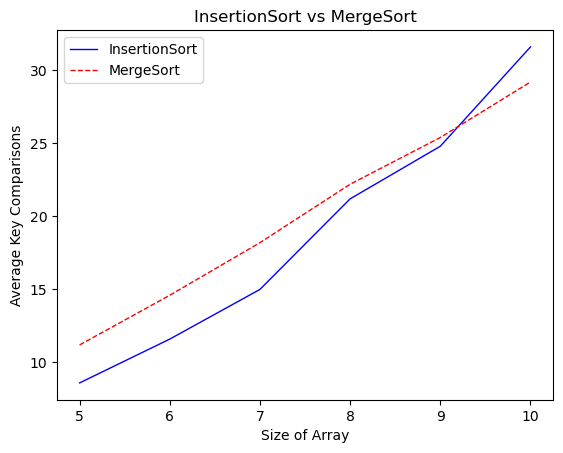

In [15]:
fig, ax = plt.subplots()
ax.plot(df1['Size of array'], df1['Average Key Comparisons'], label='InsertionSort', color='blue', linestyle='-',linewidth=1)
ax.plot(df2['Size of array'], df2['Average Key Comparisons'], label='MergeSort', color='red', linestyle='--',linewidth=1)


ax.set_xlabel('Size of Array')
ax.set_ylabel('Average Key Comparisons')
ax.set_title('InsertionSort vs MergeSort')
ax.legend()
plt.show()

From the comparisons between InsertionSort and MergeSort for smaller size of array, we found out that InsertionSort is faster than MergeSort when the size of array is less than or equal to around 9. 

From our own testing, we can see that key comparisons and time taken is the least when S is in the range from 1 to 15. This means that the optimal value of S lies within this range.
We now find out the number of key comparisons when S is in the range from 1 to 15 for different array sizes.

In [16]:
df1 = pd.read_csv('hybridsort_output_varying_(S1-15)_1000.csv')
df2 = pd.read_csv('hybridsort_output_varying_(S1-15)_10000.csv')
df3 = pd.read_csv('hybridsort_output_varying_(S1-15)_100000.csv')
df4 = pd.read_csv('hybridsort_output_varying_(S1-15)_1000000.csv')
df5 = pd.read_csv('hybridsort_output_varying_(S1-15)_5000000.csv')
df6 = pd.read_csv('hybridsort_output_varying_(S1-15)_10000000.csv')

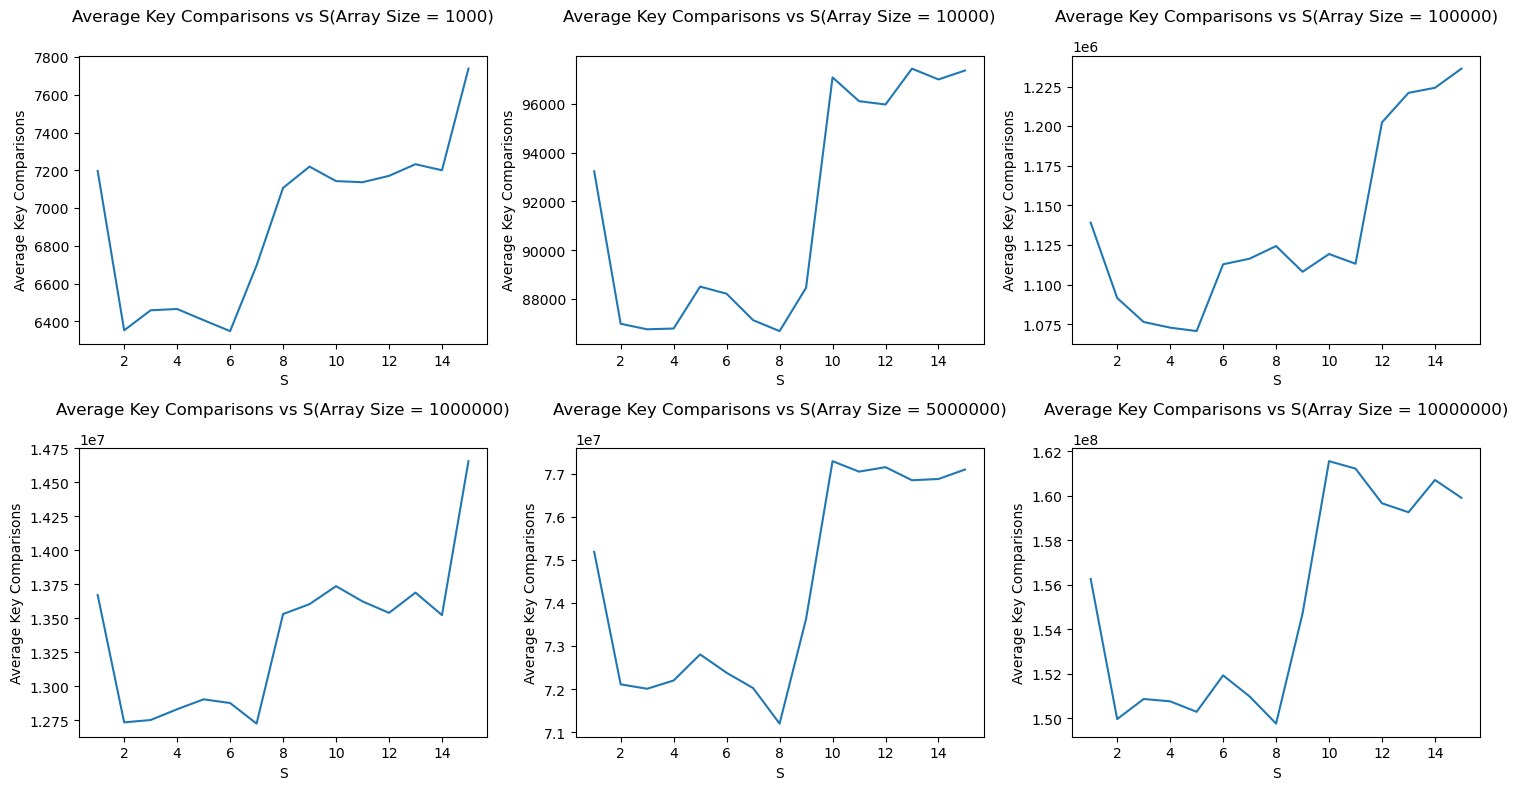

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

datasets = [
    (df1, 'Average Key Comparisons vs S(Array Size = 1000)', 'S', 'Average Key Comparisons'),
    (df2, 'Average Key Comparisons vs S(Array Size = 10000)','S',  'Average Key Comparisons'),
    (df3, 'Average Key Comparisons vs S(Array Size = 100000)','S',  'Average Key Comparisons'),
    (df4, 'Average Key Comparisons vs S(Array Size = 1000000)','S',  'Average Key Comparisons'),
    (df5, 'Average Key Comparisons vs S(Array Size = 5000000)', 'S', 'Average Key Comparisons'),
    (df6, 'Average Key Comparisons vs S(Array Size = 10000000)','S', 'Average Key Comparisons')
]


for i, (data, title, xlabel, ylabel) in enumerate(datasets):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(data.iloc[:, 1], data.iloc[:, 2]) 
    ax.set_title(title , y = 1.09)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)


plt.tight_layout()
plt.show()

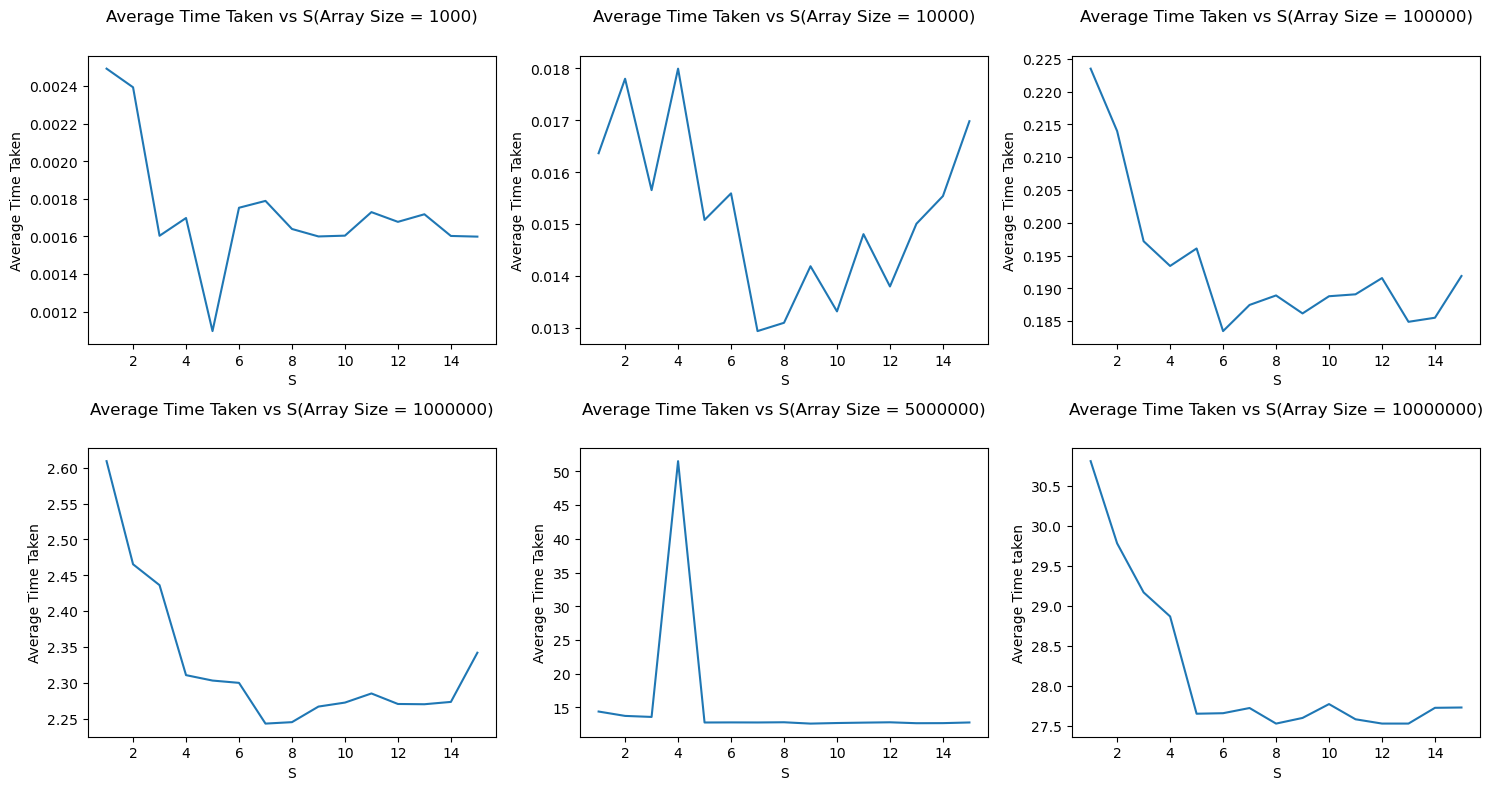

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
datasets = [
    (df1, 'Average Time Taken vs S(Array Size = 1000)', 'S', 'Average Time Taken', 4),
    (df2, 'Average Time Taken vs S(Array Size = 10000)', 'S', 'Average Time Taken', 4),
    (df3, 'Average Time Taken vs S(Array Size = 100000)', 'S', 'Average Time Taken', 4),
    (df4, 'Average Time Taken vs S(Array Size = 1000000)', 'S', 'Average Time Taken', 4),
    (df5, 'Average Time Taken vs S(Array Size = 5000000)', 'S', 'Average Time Taken', 4),
    (df6, 'Average Time Taken vs S(Array Size = 10000000)','S', 'Average Time taken', 4)
]

for i, (data, title, xlabel, ylabel, y_col) in enumerate(datasets):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(data.iloc[:, 1], data.iloc[:, 3])  
    ax.set_title(title, y=1.09)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
plt.tight_layout()
plt.show()

In [19]:
min1= df1.loc[df1['Average Key Comparisons'].idxmin()] 
a1 = min1['S'] 
min2= df2.loc[df2['Average Key Comparisons'].idxmin()] 
a2 = min2['S'] 
min3= df3.loc[df3['Average Key Comparisons'].idxmin()] 
a3 = min3['S'] 
min4= df4.loc[df4['Average Key Comparisons'].idxmin()] 
a4 = min4['S'] 
min5= df5.loc[df5['Average Key Comparisons'].idxmin()] 
a5 = min5['S'] 
min6= df6.loc[df6['Average Key Comparisons'].idxmin()] 
a6 = min6['S']
print("Optimal Value of S for size 1000 is:", a1)
print("Optimal Value of S for size 10000 is:", a2)
print("Optimal Value of S for size 100000 is:", a3)
print("Optimal Value of S for size 1000000 is:", a4)
print("Optimal Value of S for size 5000000 is:", a5)
print("Optimal Value of S for size 10000000 is:", a6)
print(a1,a2,a3,a4,a5,a6)

Optimal Value of S for size 1000 is: 6.0
Optimal Value of S for size 10000 is: 8.0
Optimal Value of S for size 100000 is: 5.0
Optimal Value of S for size 1000000 is: 7.0
Optimal Value of S for size 5000000 is: 8.0
Optimal Value of S for size 10000000 is: 8.0
6.0 8.0 5.0 7.0 8.0 8.0


In [20]:
print("Average S:",((a1+a2+a3+a4+a5+a6)/6))

Average S: 7.0


We now look at the time taken for each S


In [21]:
min1= df1.loc[df1['Average Time Taken'].idxmin()] 
a1 = min1['S'] 
min2= df2.loc[df2['Average Time Taken'].idxmin()] 
a2 = min2['S'] 
min3= df3.loc[df3['Average Time Taken'].idxmin()] 
a3 = min3['S'] 
min4= df4.loc[df4['Average Time Taken'].idxmin()] 
a4 = min4['S'] 
min5= df5.loc[df5['Average Time Taken'].idxmin()] 
a5 = min5['S'] 
min6= df6.loc[df6['Average Time Taken'].idxmin()] 
a6 = min6['S']
print("Optimal Value of S for size 1000 is:", a1)
print("Optimal Value of S for size 10000 is:", a2)
print("Optimal Value of S for size 100000 is:", a3)
print("Optimal Value of S for size 1000000 is:", a4)
print("Optimal Value of S for size 5000000 is:", a5)
print("Optimal Value of S for size 10000000 is:", a6)
print(a1,a2,a3,a4,a5,a6)

Optimal Value of S for size 1000 is: 5.0
Optimal Value of S for size 10000 is: 7.0
Optimal Value of S for size 100000 is: 6.0
Optimal Value of S for size 1000000 is: 7.0
Optimal Value of S for size 5000000 is: 9.0
Optimal Value of S for size 10000000 is: 8.0
5.0 7.0 6.0 7.0 9.0 8.0


In [22]:
print("Average S:",((a1+a2+a3+a4+a5+a6)/6))

Average S: 7.0


The average value of S is 7.This is less than the result,9, that we obtained when we compare MergeSort to InsertionSort.
Therefore, our optimal value if S would be 7. This optimal value will be used to compare the performance of HybridSort and the original MergeSort algotithm.
5 trials will be tested and the average key comparisons and time taken will be recorded for both sorting algorithms.

In [23]:
df1 = pd.read_csv('hybridsort_test.csv')
df2 = pd.read_csv('mergesort_test.csv')

In [24]:
df1

,Array Size,S,Average Key Comparisons,Average Time Taken (seconds)
0,10000000,7,152512059.2,25.905175


In [25]:
df2

,Array Size,S,Average Key Comparisons,Average Time Taken (seconds)
0,10000000,7,158562054.2,29.104052


In [26]:
newdf = pd.concat([df1, df2], ignore_index=True)
newdf.index = ['HybridSort', 'MergeSort']
newdf

,Array Size,S,Average Key Comparisons,Average Time Taken (seconds)
HybridSort,10000000,7,152512059.2,25.905175
MergeSort,10000000,7,158562054.2,29.104052


From the result, we can see that the key comparisons and time taken of HybridSort is both lower than that of MergeSort at the optimal value of S=7. We conclude that HybridSort has a better performance than MergeSort when the optimal value S=7.